In [270]:
import numpy as np
import matplotlib.pyplot as plt

In [271]:
#word 2 vec
vocab = []
def oneHotEncoding(filename):
    mylist = []
    file = open(filename, "r")
    for l in file:
        line = l.rstrip("\n")
        words = line.split(" ")
        for w in words:
            if w not in mylist:
                mylist.append(w)
                
    return mylist
                
vocab = oneHotEncoding("w2v.txt")
print(vocab)

def word2Vec(voc, wrd):
    try:
        place = voc.index(wrd)
        outVec = np.zeros((len(voc), 1))
        outVec[place][0] = 1
        return outVec
    except:
        return np.zeros((len(voc), 1))

print(word2Vec(vocab, "KRALJICINA"))
print("Vocab size: " + str(len(vocab)))

['MARINE', 'SEA', 'OCEAN', 'PLANTS', 'ANIMALS', 'ORGANISMS', 'SALT', 'WATER', 'BRACKISH', 'COASTAL', 'ESTUARIES', 'AT', 'FUNDAMENTAL', 'LEVEL', 'AFFECTS', 'NATURE', 'PLANET', 'MOSTLY', 'MICROORGANISMS', 'PRODUCE', 'OXYGEN', 'SEQUESTER', 'CARBON', 'SHORELINES', 'PART', 'SHAPED', 'PROTECTED', 'HELP', 'CREATE', 'LAND', 'THE', 'TERM', 'COMES', 'LATIN', 'MARE', 'MEANING', 'MOST', 'FORMS', 'EVOLVED', 'INITIALLY', 'HABITATS', 'BY', 'VOLUME', 'OCEANS', 'PROVIDE', '90', 'PERCENT', 'LIVING', 'SPACE', 'PLANET2', 'EARLIEST', 'VERTEBRATES', 'APPEARED', 'FISH3', 'EXCLUSIVELY', 'SOME', 'AMPHIBIANS', 'SPEND', 'PORTIONS', 'LIVES', 'OTHER', 'FISH', 'MAMMALS', 'SUBSEQUENTLY', 'RETURNED', 'SEALS', 'DOLPHINS', 'WHALES', 'PLANT', 'KELP', 'ALGAE', 'GROW', 'BASIS', 'UNDERWATER', 'ECOSYSTEMS', 'PLANKTON', 'GENERAL', 'FOUNDATION', 'FOOD', 'CHAIN', 'PARTICULARLY', 'PHYTOPLANKTON', 'KEY', 'PRIMARY', 'PRODUCERS', 'INVERTEBRATES', 'EXHIBIT', 'WIDE', 'RANGE', 'MODIFICATIONS', 'SURVIVE', 'POORLY', 'OXYGENATED', 'WATE

In [272]:
def activate(x, func):
    if func == "tanh":
        return np.tanh(x)
    
    elif func == "sigmoid":
        return 1.0/(1.0+np.exp(-x))
    
    elif func == "none":
        return x
    
    elif func == "softmax":
        return softmax(x)
    
    else:
        return None
    
    
    
def activateDer(x, func):
    if func == "tanh":
        return 1 - x**2
    
    elif func == "sigmoid":
        return x*(1-x)
    
    elif func == "none":
        return np.ones(x.shape)
    
    elif func == "softmax":
        return x
    else:
        return np.zeros(x.shape)
    
def softmax(X):
    theta = 1
    ps = np.exp(X * theta)
    ps /= np.sum(ps)
    return ps
    
def MSE_der(tar, x):
    return 2*(x-tar)

def MSE(tar, x):
    return (x-tar)**2


In [273]:
class Layer:
    
    def __init__(self, inp, out, act, lr):
        self.activation = act
        self.inputs = inp
        self.outputs = out
        self.learnRate = lr
        
        self.Wx = np.random.rand(self.outputs, self.inputs) * 2 - 1
        self.Wb = np.random.rand(self.outputs, 1) * 2 - 1
        self.A = np.zeros((self.outputs, 1))
        self.X = np.zeros((self.inputs, 1))
        
    def forwardPass(self, inp):
        self.X = inp
        self.Z = self.Wx @ inp + self.Wb
        self.A = activate(self.Z, self.activation)
        return self.A
    
    def backprop(self, grad):
        dEdA = grad
        dAdZ = activateDer(self.A, self.activation)
        dZdWx = self.X.T
        
        dEdZ = dEdA * dAdZ
        
        dEdWx = dEdZ @ dZdWx
        dEdX = self.Wx.T @ dEdZ
        dEdWb = dEdZ
        
        self.Wx = self.Wx - self.learnRate * dEdWx
        self.Wb = self.Wb - self.learnRate * dEdWb
        
        #dEdWb
        return dEdX
    

In [274]:
class Network:
    
    def __init__(self, bs, lr):
        self.layers = []
        self.batchSize = bs
        self.learnRate = lr
        
    
    def addLayer(self, inp, out, act):
        layer = Layer(inp, out, act, self.learnRate)
        self.layers.append(layer)
        self.ERROR = np.zeros((out,1))
        self.ERRORDER = np.zeros((out,1))
        
    def forwardPass(self, inp):
        self.layers[0].forwardPass(inp)
        for l in range(1, len(self.layers)):
            self.layers[l].forwardPass(self.layers[l-1].A)
        return self.layers[-1].A
    
    def error(self, ans):
        self.ERROR += MSE(ans, self.layers[-1].A)
        self.ERRORDER += MSE_der(ans, self.layers[-1].A)
    
    def backprop(self):
        grad = self.ERRORDER / self.batchSize
        for i in range(1, len(self.layers)+1):
            grad = self.layers[-i].backprop(grad)
            
        errToReturn = self.ERROR / self.batchSize
        self.ERROR.fill(0)
        self.ERRORDER.fill(0)
        return errToReturn

In [275]:
data = np.zeros((0, len(vocab), 1))
ans = np.zeros((0, len(vocab), 1))
for i in range(0, len(vocab)):
    v = vocab[i]
    if(i+1 <= len(vocab)-1):
        data = np.append(data, [word2Vec(vocab, v)], axis=0)
        ans = np.append(ans, [word2Vec(vocab, vocab[i+1])], axis=0)
    if(i-1 >= 0):
        data = np.append(data, [word2Vec(vocab, v)], axis=0)
        ans = np.append(ans, [word2Vec(vocab, vocab[i-1])], axis=0)
    

Epoch: 0
Epoch: 10
Epoch: 20
Epoch: 30
Epoch: 40
Epoch: 50
Epoch: 60
Epoch: 70
Epoch: 80
Epoch: 90
Epoch: 100
Epoch: 110
Epoch: 120
Epoch: 130
Epoch: 140
Epoch: 150
Epoch: 160
Epoch: 170
Epoch: 180
Epoch: 190
Epoch: 200
Epoch: 210
Epoch: 220
Epoch: 230
Epoch: 240
Epoch: 250
Epoch: 260
Epoch: 270
Epoch: 280
Epoch: 290
Epoch: 300
Epoch: 310
Epoch: 320
Epoch: 330
Epoch: 340
Epoch: 350
Epoch: 360
Epoch: 370
Epoch: 380
Epoch: 390
Epoch: 400
Epoch: 410
Epoch: 420
Epoch: 430
Epoch: 440
Epoch: 450
Epoch: 460
Epoch: 470
Epoch: 480
Epoch: 490


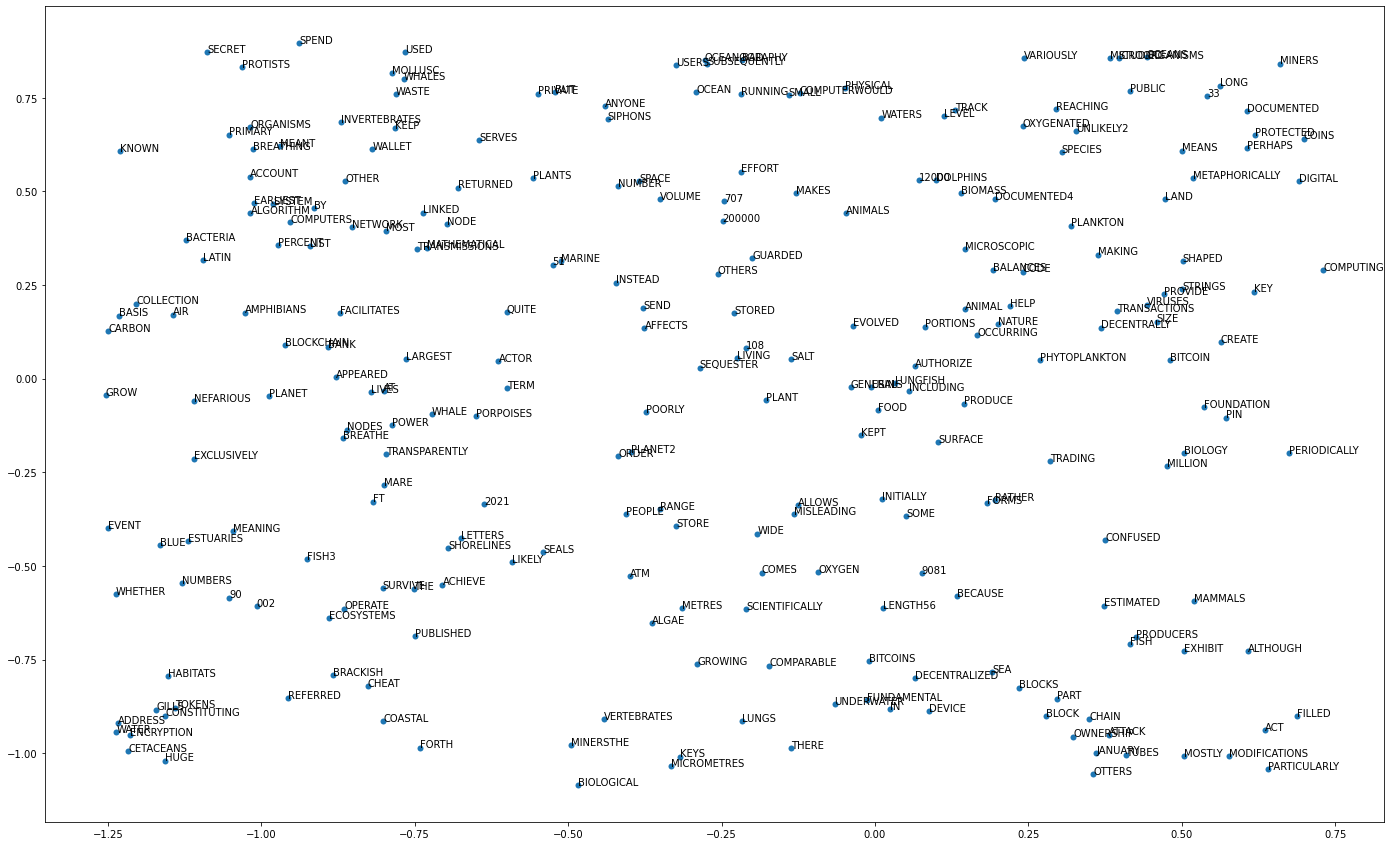

In [276]:
batchSize = 1
epochs = 500
learnRate = 0.001
printRate = 20000
network = Network(batchSize, learnRate)
network.addLayer(len(data[0]), 2, "none")
network.addLayer(2, len(data[0]), "softmax")

for e in range(0, epochs):
    if e % 10 == 0:
        print("Epoch: " + str(e))
    for i in range(0, len(data)):
        #if (e*len(data) + i + 1)%printRate == 0:
        #    print("EPOCH " + str(e) + " , SAMPLE " + str(i) + "-----------------")
        #    print("Forward pass:" + str(network.forwardPass(data[i])))
        #    print("Truth: " + str(ans[i]))
        #else:
        network.forwardPass(data[i])
        network.error(ans[i])
        #if (e*len(data) + i + 1) % batchSize == 0 and (e*len(data) + i + 1)%printRate == 0:
        #    print("                          Backprop: " + str(network.backprop()))
        #else:
        network.backprop()
    
toPlotX = []
toPlotY = []

for d in vocab:
    vect = word2Vec(vocab, d)
    network.forwardPass(vect)
    vec = network.layers[0].A
    toPlotX.append(vec.squeeze()[0])
    toPlotY.append(vec.squeeze()[1])
    
plt.figure(figsize=(24, 15))
plt.scatter(toPlotX, toPlotY, linewidth=0)
for i, txt in enumerate(vocab):
    plt.annotate(txt, (toPlotX[i], toPlotY[i]))
plt.show()